# Analyze and Predict the causes of Wild FIRES ACROSS US 50 STATES


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from numpy import arange

#### Create connection with sqlite database to import the dataset which is stores in sqlite database.

In [4]:
conn = sqlite3.connect(r"C:\Users\RG\Desktop\DS-WildFire-TermProject-002\DataBase\WildFire.sqlite")
wildfire = pd.read_sql_query("select * from Fires", conn)
%store wildfire

Stored 'wildfire' (DataFrame)


In [4]:
column_names = wildfire.columns
column_names = column_names.str.lower()
wildfire.columns = column_names

The following codes conduct brief exploratory analysis on wildfires. We will look at:
- Which year has the highest number of wildfires?
- What states have the most wildfires during the period 1992-2015?
- What is the most common reason of a wildfire?

### Exploratory Data Analysis (EDA)

In [3]:
wildfire.head(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.635278,-120.103611,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...
6,7,7,FS-1418851,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.688333,-120.153333,5.0,USFS,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00$o\x996\xd0\t^\xc0h\...
7,8,8,FS-1418854,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,40.968056,-122.433889,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00t)\xe8\xd5\xc4\x9b^\...
8,9,9,FS-1418856,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,...,B,41.233611,-122.283333,13.0,STATE OR PRIVATE,CA,None,None,None,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""\x92^\..."
9,10,10,FS-1418859,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.548333,-120.149167,5.0,USFS,CA,5,005,Amador,b'\x00\x01\xad\x10\x00\x00dS\\\xf2\x8b\t^\xc0\...


In [4]:
len(wildfire)

1880465

In [5]:
wildfire.ndim,wildfire.size

(2, 73338135)

In [9]:
wildfire.tail()

,objectid,fod_id,fpa_id,source_system_type,source_system,nwcg_reporting_agency,nwcg_reporting_unit_id,nwcg_reporting_unit_name,source_reporting_unit,source_reporting_unit_name,...,fire_size_class,latitude,longitude,owner_code,owner_descr,state,county,fips_code,fips_name,shape
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...
1880464,1880465,300348399,2015CAIRS26733926,NONFED,ST-CACDF,ST/C&L,USCABDU,San Bernardino Unit,CABDU,CDF - San Bernardino Unit,...,A,34.263217,-116.830950,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x1c\xa7\xe8H.5]\xc0...


In [6]:
wildfire.isna().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

In [11]:
wildfire.describe()

,objectid,fod_id,fire_year,discovery_date,discovery_doy,stat_cause_code,cont_date,cont_doy,fire_size,latitude,longitude,owner_code
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [12]:
wildfire.fire_year.value_counts()

2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
1994     75955
2002     75656
1996     75574
2015     74491
2012     72769
1995     71472
2004     69279
1998     68370
2003     68261
1992     67975
2014     67753
2013     64780
1993     61989
1997     61450
Name: fire_year, dtype: int64

In [14]:
wildfire.state.value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: state, dtype: int64

California, Georgia, Texas, and North Carolina are the states that suffered the most from wildfires. (Not surprising, since these states have a lot of trees!)

### How many times fire errupts due to which cause?

In [13]:
wf_cause_num = wildfire.stat_cause_descr.value_counts()
wf_cause_num

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: stat_cause_descr, dtype: int64

### Discovering the Cause factor behind these Wildfires

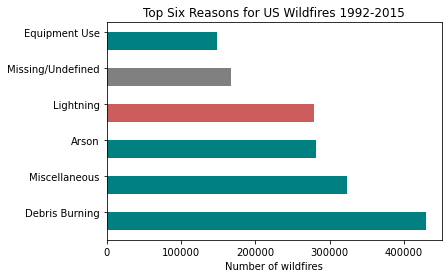

In [15]:
x_lables = ['Debris Burning', 'Miscellaneous', 'Arson', 'Lightning',
       'Missing/Undefined','Equipment Use']

bar_widths = wf_cause_num[:6] # Convert burned acres to millions
bar_positions = arange(6) + 0.75
tick_positions = range(1,7)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5, color = ['teal', 'teal', 'teal', 'indianred', 'grey', 'teal'])
ax.set_yticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_yticklabels(x_lables)

ax.set_xlabel("Number of wildfires")
ax.set_title("Top Six Reasons for US Wildfires 1992-2015")

plt.savefig('num_6_reasons.png')

From the above statistics, it looks like that 'Debris Burning' is the reason that caused the most wildfires. However, is it also the reason that caused the most burned acres? This question can be answered if we look closer at the statistics on burned acreas, which are indicated by column 'fire_size'.

### Calculate burned acres per year

In [16]:
burned_acres = wildfire.groupby('fire_year').sum()[['fire_size']]
burned_acres.sort_values(by = 'fire_size', ascending = False)

,fire_size
fire_year,
2015,1.021827e+07
2006,1.004350e+07
2005,9.665105e+06
2011,9.623597e+06
2012,9.439888e+06
2007,9.265429e+06
2004,8.234208e+06
2000,7.639499e+06
2002,6.803258e+06


### Calculate burned acres per cause

In [17]:
burned_causes = wildfire.groupby('stat_cause_descr').sum()[['fire_size']] 
burned_causes = burned_causes.sort_values(by = 'fire_size', ascending = False)
burned_causes = burned_causes[:6] # Select the top 6 causes

### Showing Burned Acres per cause on Bar chart

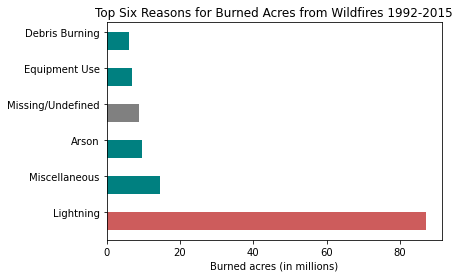

In [18]:
x_lables = ['Lightning', 'Miscellaneous', 'Arson', 'Missing/Undefined',
       'Equipment Use','Debris Burning']

bar_widths = burned_causes['fire_size'].values/1000000 # Convert burned acres to millions
bar_positions = arange(6) + 0.75
tick_positions = range(1,7)

fig, ax = plt.subplots()
ax.barh(bar_positions,bar_widths,0.5, color = ['indianred','teal','teal','grey','teal','teal'])
ax.set_yticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_yticklabels(x_lables)

ax.set_xlabel("Burned acres (in millions)")
ax.set_title("Top Six Reasons for Burned Acres from Wildfires 1992-2015")

#Saving image of below bar chart
plt.savefig('burned_acres_6_reasons.png')

From the bar chart, we can see the top 6 reasons for burned acres caused by wildfires. Now, we will look these data by years and see if there is any trend.

### Calculate burned acres per Year and Observe Trends if any!

In [19]:
burned_causes_by_year = wildfire.groupby(['stat_cause_descr','fire_year']).sum()[['fire_size']] 

In [20]:
burned_causes_by_year = burned_causes_by_year.unstack(level=-1)
burned_causes_by_year.columns = burned_causes_by_year.columns.droplevel()
burned_causes_by_year = burned_causes_by_year/1000

In [21]:
burned_causes_by_year.index

Index(['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use',
       'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined',
       'Powerline', 'Railroad', 'Smoking', 'Structure'],
      dtype='object', name='stat_cause_descr')

In [22]:
burned_causes_by_year = burned_causes_by_year.loc[['Arson', 'Debris Burning', 'Equipment Use',
       'Lightning', 'Miscellaneous', 'Missing/Undefined']]

### Showing Burned Acres per Year on Bar chart

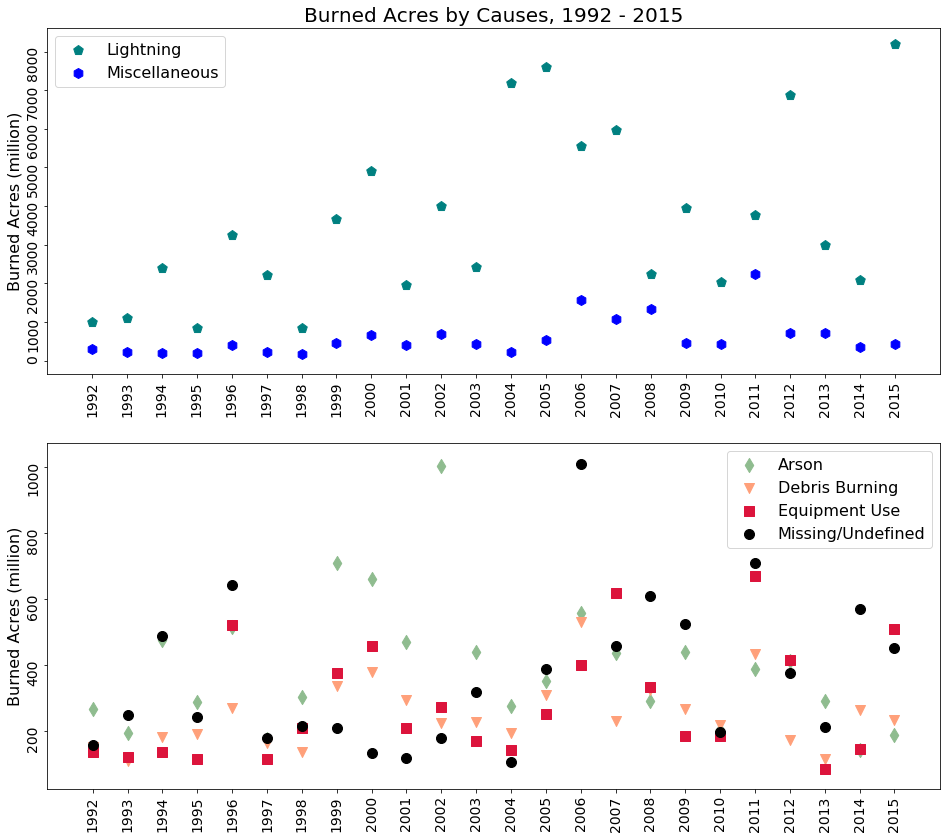

In [15]:
y = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

fig = plt.figure(figsize=(16,14))
ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(211)

ax1.scatter(y, burned_causes_by_year.loc['Arson'], s=100, c='darkseagreen', marker="d", label='Arson')
ax1.scatter(y, burned_causes_by_year.loc['Debris Burning'], s=100, c='lightsalmon', marker="v", label='Debris Burning')
ax1.scatter(y, burned_causes_by_year.loc['Equipment Use'], s=100, c='crimson', marker="s", label='Equipment Use')
ax1.scatter(y, burned_causes_by_year.loc['Missing/Undefined'], s=100, c='k', marker='o', label='Missing/Undefined')
ax2.scatter(y, burned_causes_by_year.loc['Lightning'], s=100, c='teal', marker='p', label='Lightning')
ax2.scatter(y, burned_causes_by_year.loc['Miscellaneous'], s=100, c='b', marker='h', label='Miscellaneous')

ax1.set_ylabel('Burned Acres (million)',fontsize = 16)
ax1.legend(labels=['Arson', 'Debris Burning','Equipment Use','Missing/Undefined'],fontsize = 16)
ax1.set_xticks(y)
ax1.tick_params(labelsize=14,rotation = 90)

ax2.set_title('Burned Acres by Causes, 1992 - 2015',fontsize = 20)
ax2.set_ylabel('Burned Acres (million)',fontsize = 16)
ax2.legend(labels=['Lightning','Miscellaneous'],fontsize = 16)
ax2.set_xticks(y)
ax2.tick_params(labelsize=14,rotation = 90)
plt.show()

From the scatter plot, we can see that there might be some linear relationship between burned acres caused by lightning related wildfires and years. However, the relationship is not 100% clear and may require deeper analysis. A stacked bar chart could be more straightforward in presenting the descriptive trends.

### Showing Burned Acres per Year on Stacked Bar chart

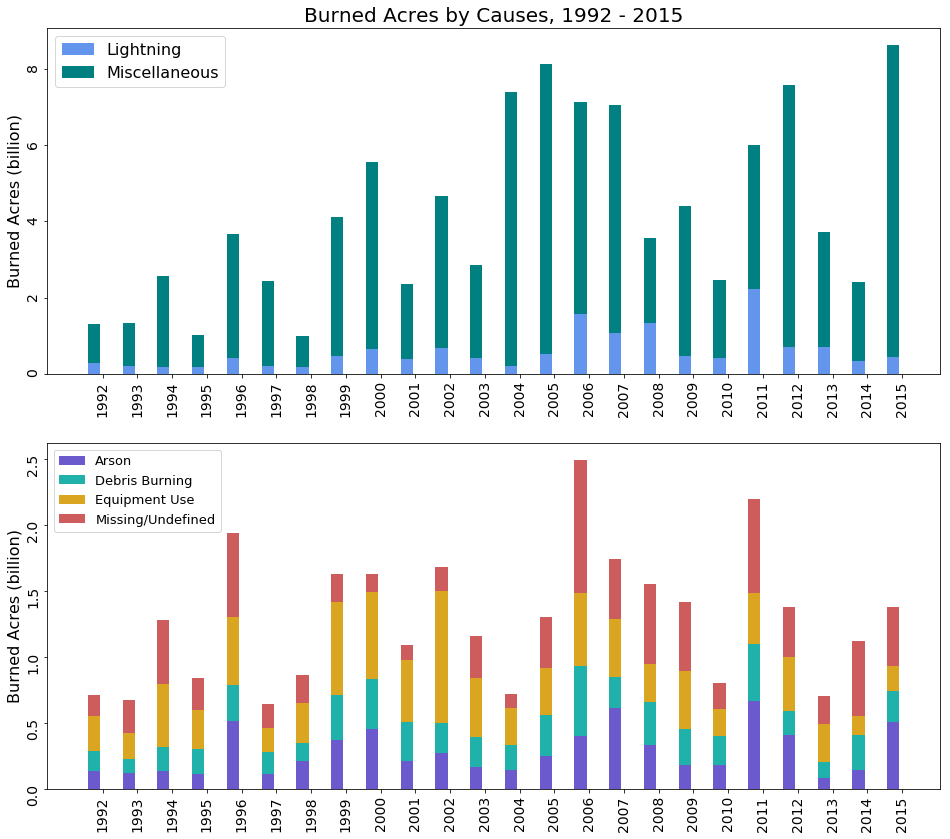

In [16]:
y = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

bar_height1 = burned_causes_by_year.loc['Lightning'].values/1000 
bar_height2 = burned_causes_by_year.loc['Miscellaneous'].values/1000 
bar_height3 = burned_causes_by_year.loc['Debris Burning'].values/1000 
bar_height4 = burned_causes_by_year.loc['Equipment Use'].values/1000 
bar_height5 = burned_causes_by_year.loc['Missing/Undefined'].values/1000 
bar_height6 = burned_causes_by_year.loc['Arson'].values/1000 

plt_index = arange(24) + 0.75
tick_positions= range(1,25)

fig = plt.figure(figsize=(16,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.bar(plt_index, bar_height1, width = 0.35, color = 'cornflowerblue')
ax1.bar(plt_index, bar_height1, width = 0.35, bottom = bar_height2, color = 'teal')

ax2.bar(plt_index, bar_height4, width = 0.35, color = 'slateblue')
ax2.bar(plt_index, bar_height3, width = 0.35, bottom = bar_height4, color = 'lightseagreen')
ax2.bar(plt_index, bar_height6, width = 0.35, bottom = bar_height3 +bar_height4 , color = 'goldenrod')
ax2.bar(plt_index, bar_height5, width = 0.35, bottom = bar_height6 +bar_height3 + bar_height4, color = 'indianred')

ax1.set_title('Burned Acres by Causes, 1992 - 2015',fontsize = 20)
ax1.set_ylabel('Burned Acres (billion)',fontsize = 16)
ax1.legend(labels=['Lightning','Miscellaneous'],fontsize = 16)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(y)
ax1.tick_params(labelsize=14,rotation = 90)

ax2.set_ylabel('Burned Acres (billion)',fontsize = 16)
ax2.legend(labels=['Arson', 'Debris Burning','Equipment Use','Missing/Undefined'],fontsize = 13, loc = 'upper left')
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(y)
ax2.tick_params(labelsize=14,rotation = 90)
plt.show()

The above figure shows that wildfires that burned the most acres are usually cuased natural reason: lighting. However, if we look at other human-related reasons, we can see a lot of wildfires that burned much acres have missing reasons. Arson is the top human-related reasons for wildfires burnt the most acres.



In [ ]:
wildfire['fire_size'].quantile(0.994) 

In [25]:
wildfire['fire_size'].quantile(0.990) 

460.0

From the quantiles, we can tell that the distribution of the size of wildfire is very skewed. We will then focus on the extremely destructive wildfires, which had burned more than 1000 acres of land. 

### Observe which state have lost more that 1000 acres due to wildfire

In [26]:
severe_wildfire = wildfire[wildfire['fire_size'] > 1000]
severe_wf_counts = severe_wildfire['state'].value_counts()

In [27]:
severe_wf_counts

CA    1116
ID    1079
AK    1056
TX     914
NV     694
NM     684
OR     602
MT     586
AZ     572
FL     500
UT     493
OK     482
WA     381
WY     304
SD     236
CO     220
KS     151
MN     143
KY      96
LA      88
NE      86
WV      80
ND      59
GA      51
VA      48
HI      48
NC      47
TN      47
MS      44
AL      32
AR      30
MO      27
NJ      17
SC      17
MI      14
MD      12
WI       8
IA       4
PR       4
PA       4
NY       3
DE       2
OH       2
ME       1
IN       1
CT       1
IL       1
Name: state, dtype: int64

In [28]:
%store severe_wf_counts

Stored 'severe_wf_counts' (Series)


In [29]:
severe_county_counts = severe_wildfire.county.value_counts()
%store severe_county_counts

Stored 'severe_county_counts' (Series)


## Make a map based on the severe wildfire counts by states

In [7]:
import os.path
import folium
 
# Load the shape of the zone (US states)
state_geo = os.path.join(r"C:\Users\RG\Desktop\DataSets\us-states.json")
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=severe_wf_counts,
 columns=['State', 'Wildfire'],
 threshold_scale=[0, 200, 400, 600, 800, 1000, 1200],
 key_on='feature.id',
 fill_color='OrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Severe Wildfire (burned acres > 1000) counts',
 nan_fill_color = 'seashell'
)
folium.LayerControl().add_to(m)


NameError: name 'severe_wf_counts' is not defined

In [33]:
m

From above, we can see CA, ID, AK and TX are the four states that have the most severe wildfires. The following codes produce a detailed look on how many severe wildfires these states have per year and how much acres were burned each year.

## Discover severe Wildfire US States have per YEAR and How much Acres were BURNED each Year

In [34]:
severe_wildfire_by_state_count = severe_wildfire.groupby(['state','fire_year']).count()[['objectid']]
severe_wildfire_by_state_count = severe_wildfire_by_state_count.unstack(level=-1)
severe_wildfire_by_state_count.columns = severe_wildfire_by_state_count.columns.droplevel()

In [35]:
severe_wildfire_by_state_count.dropna()

fire_year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
state,,,,,,,,,,,,,,,,,,,,,
AK,11.0,44.0,32.0,11.0,38.0,44.0,5.0,41.0,24.0,8.0,...,11.0,41.0,12.0,64.0,72.0,23.0,27.0,67.0,6.0,208.0
AZ,8.0,31.0,44.0,42.0,13.0,1.0,4.0,14.0,15.0,6.0,...,31.0,17.0,24.0,42.0,16.0,39.0,30.0,19.0,24.0,27.0
CA,42.0,32.0,56.0,37.0,89.0,33.0,22.0,72.0,23.0,38.0,...,67.0,46.0,122.0,43.0,20.0,28.0,40.0,31.0,34.0,53.0
FL,13.0,7.0,8.0,7.0,11.0,10.0,49.0,28.0,35.0,59.0,...,27.0,39.0,20.0,27.0,11.0,40.0,18.0,9.0,16.0,21.0
ID,46.0,1.0,52.0,36.0,72.0,10.0,29.0,44.0,98.0,32.0,...,87.0,97.0,26.0,7.0,43.0,41.0,88.0,51.0,19.0,65.0
MT,9.0,1.0,44.0,6.0,22.0,3.0,16.0,17.0,63.0,15.0,...,52.0,42.0,14.0,9.0,5.0,20.0,79.0,11.0,7.0,44.0
NM,13.0,43.0,79.0,25.0,25.0,21.0,19.0,17.0,51.0,17.0,...,56.0,25.0,51.0,40.0,19.0,97.0,8.0,5.0,7.0,7.0
NV,13.0,12.0,27.0,18.0,61.0,7.0,17.0,90.0,62.0,48.0,...,89.0,51.0,8.0,3.0,5.0,34.0,48.0,21.0,10.0,4.0
OR,21.0,2.0,33.0,10.0,42.0,5.0,16.0,18.0,30.0,33.0,...,42.0,35.0,22.0,12.0,15.0,38.0,31.0,28.0,56.0,30.0


In [36]:
severe_wildfire_by_state = severe_wildfire.groupby(['state','fire_year']).sum()[['fire_size']] 
severe_wildfire_by_state = severe_wildfire_by_state.unstack(level=-1)
severe_wildfire_by_state.columns = severe_wildfire_by_state.columns.droplevel()
severe_wildfire_by_state = severe_wildfire_by_state/1000

In [37]:
severe_wildfire_by_state.dropna()

fire_year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
state,,,,,,,,,,,,,,,,,,,,,
AK,132.5570,665.3605,241.4469,37.6100,588.3509,2003.2280,116.02100,990.20000,748.467400,214.9750,...,249.03570,610.53770,82.77770,2938.0009,1116.8144,282.0750,290.49580,1304.95170,227.71510,5103.35879
AZ,14.4660,124.2831,176.0080,200.6104,165.4311,1.9060,12.18900,58.56060,68.192000,20.9920,...,146.55040,97.18300,98.08073,192.2095,72.4361,1013.9365,205.07770,89.21100,188.17900,142.34100
CA,209.7670,248.9100,334.0181,147.0700,592.8130,273.1850,110.20000,733.52040,210.941200,294.8210,...,735.48830,984.09526,1351.40100,416.6100,81.7010,141.4618,721.89740,537.98825,516.66220,810.25957
FL,25.3000,20.2945,44.3200,23.4080,37.9540,69.7760,287.07800,322.90400,123.709000,318.0709,...,179.70500,455.42290,134.84440,87.5068,33.1190,242.3057,90.22700,44.19100,123.86100,120.86500
ID,643.4350,2.8060,678.8812,236.2330,842.2135,24.7500,127.01170,372.65640,1310.339600,153.4411,...,869.02200,2145.56876,155.27020,10.5920,618.9814,384.2850,1725.37400,701.46300,178.89600,761.34850
MT,21.1090,7.6800,219.9020,12.2020,178.4303,5.2855,83.12739,93.83805,776.824000,147.3940,...,827.47500,714.93324,148.61063,42.0850,43.3752,128.0935,967.49350,64.79090,19.36300,319.99840
NM,84.1500,260.7780,328.2550,109.4290,133.5730,147.1150,67.12300,62.42900,447.636899,52.4275,...,502.65300,108.29300,341.41500,378.2332,104.8490,1076.0123,354.32400,280.58100,36.48600,41.09300
NV,82.7260,48.0830,183.0380,103.5010,595.1515,31.2370,77.84210,1740.35220,627.048200,572.0079,...,1286.12420,928.92780,70.49370,23.4845,14.6669,407.5436,435.17838,167.15137,64.63370,18.13820
OR,94.2391,3.9600,247.5842,45.0390,558.4476,12.9243,67.46950,46.84540,348.915500,363.5679,...,474.67730,543.71100,224.39850,75.0866,80.0284,207.8280,1516.23330,302.77760,914.93241,558.54070


### Showing most WildFire in US 4 States

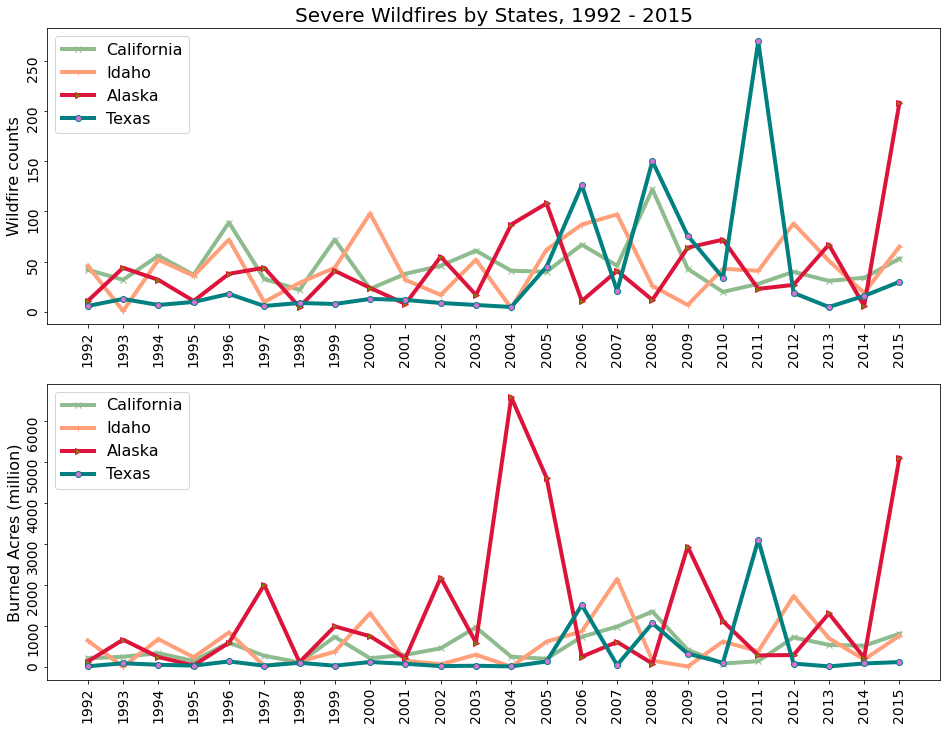

In [39]:
year = range(1992,2016)
ca = severe_wildfire_by_state.loc["CA"]
idn = severe_wildfire_by_state.loc["ID"]
ak = severe_wildfire_by_state.loc["AK"]
tx = severe_wildfire_by_state.loc["TX"]

ca_count = severe_wildfire_by_state_count.loc["CA"]
idn_count = severe_wildfire_by_state_count.loc["ID"]
ak_count = severe_wildfire_by_state_count.loc["AK"]
tx_count = severe_wildfire_by_state_count.loc["TX"]

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(211)

ax1.plot(year, ca, marker='x', markerfacecolor='maroon', markersize=6, color='darkseagreen', linewidth=4)
ax1.plot(year, idn, marker='+', markerfacecolor='coral', markersize=6, color='lightsalmon', linewidth=4)
ax1.plot(year, ak, marker='>', markerfacecolor='olive', markersize=6, color='crimson', linewidth=4)
ax1.plot(year, tx, marker='o', markerfacecolor='orchid', markersize=6, color='teal', linewidth=4)

ax2.plot(year, ca_count, marker='x', markerfacecolor='maroon', markersize=6, color='darkseagreen', linewidth=4)
ax2.plot(year, idn_count, marker='+', markerfacecolor='coral', markersize=6, color='lightsalmon', linewidth=4)
ax2.plot(year, ak_count, marker='>', markerfacecolor='olive', markersize=6, color='crimson', linewidth=4)
ax2.plot(year, tx_count, marker='o', markerfacecolor='orchid', markersize=6, color='teal', linewidth=4)


ax1.set_ylabel('Burned Acres (million)',fontsize = 16)
ax1.legend(labels=['California','Idaho','Alaska','Texas'],fontsize = 16)
ax1.set_xticks(year)
ax1.tick_params(labelsize=14,rotation = 90)

ax2.set_ylabel('Wildfire counts',fontsize = 16)
ax2.legend(labels=['California','Idaho','Alaska','Texas'],fontsize = 16)
ax2.set_xticks(year)
ax2.tick_params(labelsize=14,rotation = 90)


ax2.set_title('Severe Wildfires by States, 1992 - 2015',fontsize = 20)

plt.show()



## California wildfire analysis
 

#### Now I'am focusing on California wildfires in 2015. This is one piece of sample analysis, which could be applied to any other states. The goal is to fill in the weather data in the wildfire dataset and analyze the relationships between wildfire and weather conditions.

## Filter out the columns that are useful for analysis

In [40]:
# Filter out the columns that are useful for analysis
target_cols = ['fod_id','fire_year','discovery_date', 'discovery_doy',
       'discovery_time', 'stat_cause_code', 'stat_cause_descr', 'cont_date',
       'cont_doy', 'cont_time', 'fire_size', 'latitude','longitude','state','county']

wf_target = wildfire[target_cols]
wf_target_ca = wf_target[wf_target['state']=='CA']
wf_target_ca = wf_target_ca.reset_index()

## Construct a fire data variable in datetime format based on existing information.

In [41]:
wf_target_ca['year'] = wf_target_ca['fire_year']
wf_target_ca['month'] = 1
wf_target_ca['day'] = 1

wf_target_ca['FY'] = pd.to_datetime(wf_target_ca[['year','month','day']])
wf_target_ca['DOY'] = pd.to_timedelta(wf_target_ca['discovery_doy'],unit='d')
wf_target_ca['fire_date'] = wf_target_ca['FY'] + wf_target_ca['DOY']

#these are my targeted columns for California fire Analysis
ca_cols = ['fod_id','fire_year','fire_date','discovery_date', 'discovery_doy',
       'discovery_time', 'stat_cause_code', 'stat_cause_descr', 'cont_date',
       'cont_doy', 'cont_time', 'fire_size', 'latitude','longitude','state','county']

wf_target_ca = wf_target_ca[ca_cols]

In [42]:
wf_target_ca

,fod_id,fire_year,fire_date,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,latitude,longitude,state,county
0,1,2005,2005-02-03,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,40.036944,-121.005833,CA,63
1,2,2004,2004-05-13,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,38.933056,-120.404444,CA,61
2,3,2004,2004-06-01,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,38.984167,-120.735556,CA,17
3,4,2004,2004-06-29,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,38.559167,-119.913333,CA,3
4,5,2004,2004-06-29,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,38.559167,-119.933056,CA,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189545,300348363,2015,2015-09-27,2457291.5,269,1726,13.0,Missing/Undefined,2457291.5,269.0,1843,0.01,40.481637,-122.389375,CA,None
189546,300348373,2015,2015-10-06,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.20,37.617619,-120.938570,CA,None
189547,300348375,2015,2015-05-03,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.10,37.617619,-120.938570,CA,None
189548,300348377,2015,2015-10-15,2457309.5,287,2309,13.0,Missing/Undefined,NaN,NaN,None,2.00,37.672235,-120.898356,CA,None


## Slice the 2015 wildfires from the whole CA wildfire dataset.

In [45]:
wf_ca_2015 = wf_target_ca[wf_target_ca['fire_year'] == 2015]

In [46]:
# Get the CA weather data for year 2015, which is cleaned in another notebook: CA_weather_data.ipynb
%store -r ca_15

no stored variable or alias ca_15


In [ ]:
## My Laptop gotten into some problems leading to lost of data. Therefore my CA_weather_data file is missing, I'll make sure to retrieve it for further actvities.

## Get the county level Geological  data

In [47]:
county_geo = os.path.join(r"C:\Users\RG\Desktop\DataSets\us-counties.json")

# Clean up the CA county data in wf_ca_2015. Because the original data has a mix of county names and county ID.
ca_county_counts = wf_ca_2015.county.value_counts().to_frame()
ca_county_counts = ca_county_counts.reset_index()
ca_county_counts['index'] = ca_county_counts['index'].str.lower()
ca_county_counts = ca_county_counts.rename({'index':'county','county':'count'}, axis = 1)

ca_county_counts['county'] = ca_county_counts['county'].str.replace(' county','')
ca_county_counts['county'] = ca_county_counts['county'].str.replace('^0','60', regex = True)
ca_county_counts['county'] = ca_county_counts['county'].str.replace('^1','61', regex = True)

ca_county_counts = ca_county_counts.sort_values(by='county').reset_index()

#split ca_county_counts into two parts, one part has county id, the other part has county name
ca_county_counts_p1 = ca_county_counts.iloc[:39]
ca_county_counts_p2 = ca_county_counts.iloc[39:]


In [48]:
county_id = pd.read_csv(r"C:\Users\RG\Desktop\DataSets\county_id.csv",encoding='cp1252')
county_id.head(10)

,fips,name,state
0,1001,Autauga County,AL
1,1003,Baldwin County,AL
2,1005,Barbour County,AL
3,1007,Bibb County,AL
4,1009,Blount County,AL
5,1011,Bullock County,AL
6,1013,Butler County,AL
7,1015,Calhoun County,AL
8,1017,Chambers County,AL
9,1019,Cherokee County,AL


In [51]:
county_id = pd.read_csv(r"C:\Users\RG\Desktop\RDI\county_id.csv",encoding='cp1252')
county_id['name'] = county_id['name'].str.lower()
county_id['fips'] = county_id['fips'].astype(str)

# Filter out the CA counties, which have county ID starting with 6.
county_id_ca = county_id[county_id['fips'].str.startswith('6')]
county_id_ca_dict = dict(zip(county_id_ca.name, county_id_ca.fips))
# Map the county name with county ID.
ca_county_counts_p2['county'] = ca_county_counts_p2.county.map(county_id_ca_dict)

county_ca_all = pd.concat([ca_county_counts_p1,ca_county_counts_p2])
county_ca_all = county_ca_all.groupby(['county']).sum()[['count']]
county_ca_all = county_ca_all.reset_index()

In [54]:
# Initialize the map:
 
m = folium.Map(location=[36, -119], zoom_start=6)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data = county_geo,
 name ='choropleth',
 data = county_ca_all,
 columns=['county', 'count'],
 key_on='feature.id',
 fill_color='YlOrRd',
 threshold_scale = [0, 100, 200, 300, 400, 500, 600],
 fill_opacity=0.8,
 line_opacity=0.2,
 legend_name='Severe Wildfire (burned acres > 1000) counts',
 nan_fill_color = 'lightgray'

)
folium.LayerControl().add_to(m)
m

From the above county map, we can see counties that suffered the most from severe wildfires (burned acres > 100)

In [38]:
# filter out the unique fire date and use these dates to filter out the weather stations that have data on these dates.
fire_date = wf_ca_2015['fire_date'].unique()
ca_15['date'] = pd.to_datetime(ca_15['DATE'])
ca_15 = ca_15[ca_15['date'].isin(fire_date)]
ca_15_temp = ca_15.dropna(subset = ['TAVG'])

In [39]:
ca_15_temp

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,PSUN,TAVG,TMAX,TMIN,TOBS,TSUN,date
1,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-02,NaN,NaN,NaN,40.0,55.0,31.0,NaN,NaN,2015-01-02
2,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-03,NaN,NaN,NaN,41.0,53.0,33.0,NaN,NaN,2015-01-03
3,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-04,NaN,NaN,NaN,45.0,57.0,37.0,NaN,NaN,2015-01-04
4,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-05,NaN,NaN,NaN,52.0,69.0,40.0,NaN,NaN,2015-01-05
5,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-06,NaN,NaN,NaN,55.0,69.0,41.0,NaN,NaN,2015-01-06
7,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-08,NaN,NaN,NaN,57.0,65.0,49.0,NaN,NaN,2015-01-08
9,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-10,NaN,NaN,NaN,51.0,57.0,48.0,NaN,NaN,2015-01-10
11,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-12,NaN,NaN,NaN,54.0,64.0,46.0,NaN,NaN,2015-01-12
12,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-13,NaN,NaN,NaN,54.0,63.0,48.0,NaN,NaN,2015-01-13
13,USR0000CTHO,"THOMES CREEK CALIFORNIA, CA US",39.8644,-122.6097,317.0,2015-01-14,NaN,NaN,NaN,50.0,60.0,44.0,NaN,NaN,2015-01-14


In [40]:
ca_15_wind = ca_15.dropna(subset = ['AWND'])
ca_15_wind

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,PSUN,TAVG,TMAX,TMIN,TOBS,TSUN,date
2805,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-02,1.79,0.00,NaN,NaN,50.0,28.0,NaN,NaN,2015-01-02
2806,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-03,1.57,0.00,NaN,NaN,51.0,31.0,NaN,NaN,2015-01-03
2807,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-04,2.24,0.00,NaN,NaN,53.0,33.0,NaN,NaN,2015-01-04
2808,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-05,2.24,0.00,NaN,NaN,54.0,35.0,NaN,NaN,2015-01-05
2809,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-06,2.24,0.00,NaN,NaN,62.0,37.0,NaN,NaN,2015-01-06
2811,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-08,2.68,0.00,NaN,NaN,62.0,40.0,NaN,NaN,2015-01-08
2813,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-10,2.01,0.00,NaN,NaN,59.0,45.0,NaN,NaN,2015-01-10
2815,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-12,2.24,0.00,NaN,NaN,62.0,43.0,NaN,NaN,2015-01-12
2816,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-13,8.50,0.00,NaN,NaN,65.0,43.0,NaN,NaN,2015-01-13
2817,USW00093210,"OROVILLE MUNICIPAL AIRPORT, CA US",39.49000,-121.61833,57.9,2015-01-14,3.36,0.00,NaN,NaN,55.0,39.0,NaN,NaN,2015-01-14


In [41]:
# filter out the unique CA weather stations that have temperature data
ca_stations_temp = ca_15_temp[['STATION','LATITUDE','LONGITUDE']].drop_duplicates()
# Filter out the unique CA weather stations that have wind data
ca_stations_wind = ca_15_wind[['STATION','LATITUDE','LONGITUDE']].drop_duplicates()

In [42]:
ca_stations = ca_stations_temp.reset_index()

In [43]:
%store ca_stations_temp
%store wf_ca_2015

Stored 'ca_stations_temp' (DataFrame)
Stored 'wf_ca_2015' (DataFrame)


# Use sklearn.neighbors to find the nearest station given a wildfire.

In [45]:

import sklearn.neighbors as neighbors
from math import sin, cos, sqrt, atan2, radians

R = 6373.0
def using_sklearn(df,df1):
    
    def distance(p1, p2):
        """
        Calculate the great circle distance between two points
        on the earth (specified in decimal degrees)
        """
        lon1, lat1 = p1
        lon2, lat2 = p2
        # convert decimal degrees to radians
        lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
        # haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        km = R * c
        return km
    points = df[['latitude', 'longitude']]
    points2 = df1[['LATITUDE','LONGITUDE']]
    nbrs = neighbors.NearestNeighbors(n_neighbors=2, metric=distance).fit(points2)
    distances, indices = nbrs.kneighbors(points)
    
    return indices


## Apply the function to find the nearest weather station for all the wildfires in CA 2015.
### Result is shown as an array with index number from dataframe ca_stations_temp/ca_stations_wind. 
### The first number is the nearest station index, and the second number is the second nearest station index.

In [46]:
nearest_station_nn = using_sklearn(wf_ca_2015, ca_stations_temp)
nearest_station_wind = using_sklearn(wf_ca_2015,ca_stations_wind)

In [47]:
columns = ['nearest','second_nearest']
df_nn = pd.DataFrame(nearest_station_nn, columns=columns)
df_nn = df_nn.reset_index()
df_nn

,index,nearest,second_nearest
0,0,120,276
1,1,96,262
2,2,133,215
3,3,133,204
4,4,215,113
5,5,215,113
6,6,276,120
7,7,215,133
8,8,215,133
9,9,215,113


In [48]:
df_wd = pd.DataFrame(nearest_station_wind, columns=columns)
df_wd = df_wd.reset_index()
df_wd

,index,nearest,second_nearest
0,0,20,47
1,1,47,20
2,2,47,20
3,3,47,20
4,4,47,20
5,5,47,20
6,6,20,47
7,7,47,20
8,8,47,20
9,9,47,20


## Based on the nearest weather station index for temprature, find the station id

In [49]:
ca_station_temp = ca_stations_temp.reset_index()[['STATION','index']]
ca_station_temp['nearest'] = ca_station_temp.index
ca_2015_nn = pd.merge(left = df_nn, right = ca_station_temp, on ='nearest')
ca_2015_nn = ca_2015_nn[['index_x','STATION']]


In [50]:
wf_ca_2015 = wf_ca_2015.reset_index()
wf_ca_2015 = wf_ca_2015.reset_index()
wf_ca_2015 = wf_ca_2015.drop(['index'],axis = 1)
wf_ca_2015 = wf_ca_2015.rename({'level_0':'index_x'}, axis = 'columns')

In [51]:
wf_ca_2015

,index_x,fod_id,fire_year,fire_date,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,latitude,longitude,state,county
0,0,300201647,2015,2015-07-09,2457211.5,189,1100,1.0,Lightning,2457212.5,190.0,1500,0.10,38.633611,-119.789444,CA,003
1,1,300201649,2015,2015-08-13,2457246.5,224,1417,1.0,Lightning,2457258.5,236.0,2000,120.00,38.224722,-119.381944,CA,051
2,2,300201650,2015,2015-06-30,2457202.5,180,2124,1.0,Lightning,2457205.5,183.0,1257,0.25,38.528056,-119.553333,CA,051
3,3,300201651,2015,2015-06-16,2457188.5,166,1328,9.0,Miscellaneous,2457188.5,166.0,1853,1.00,38.365000,-119.523611,CA,051
4,4,300201652,2015,2015-06-28,2457200.5,178,2200,1.0,Lightning,2457201.5,179.0,1610,0.10,38.550833,-119.611667,CA,003
5,5,300201656,2015,2015-05-29,2457170.5,148,1730,1.0,Lightning,2457172.5,150.0,1600,1.60,38.595000,-119.677778,CA,003
6,6,300201658,2015,2015-07-02,2457204.5,182,1925,1.0,Lightning,2457205.5,183.0,0200,0.10,38.698611,-119.799722,CA,003
7,7,300201659,2015,2015-07-02,2457204.5,182,2255,1.0,Lightning,2457205.5,183.0,1940,0.10,38.496111,-119.598611,CA,003
8,8,300201660,2015,2015-07-02,2457204.5,182,2255,1.0,Lightning,2457206.5,184.0,1400,0.10,38.483889,-119.598056,CA,003
9,9,300201661,2015,2015-07-03,2457205.5,183,1315,1.0,Lightning,2457205.5,183.0,1900,0.10,38.560833,-119.589444,CA,003


##  Match each wildfire with the nearest weather station ID to get average temperature data of the fire date.

In [52]:
wf_ca_2015_nn = pd.merge(left = ca_2015_nn, right = wf_ca_2015, on = 'index_x')

## Match each wildfire with average temperature data based on nearest weather station id and fire date.

In [53]:
ca_15_tavg = ca_15_temp[['STATION','date','TAVG',]]
ca_wf_temp15 = pd.merge(wf_ca_2015_nn, ca_15_tavg, how='left', left_on=['STATION','fire_date'], right_on = ['STATION','date'])

In [54]:
ca_wf_temp15

,index_x,STATION,fod_id,fire_year,fire_date,discovery_date,discovery_doy,discovery_time,stat_cause_code,stat_cause_descr,cont_date,cont_doy,cont_time,fire_size,latitude,longitude,state,county,date,TAVG
0,0,USR0000CMRK,300201647,2015,2015-07-09,2457211.5,189,1100,1.0,Lightning,2457212.5,190.0,1500,0.10,38.633611,-119.789444,CA,003,2015-07-09,53.0
1,11,USR0000CMRK,300201664,2015,2015-08-02,2457235.5,213,1435,1.0,Lightning,2457235.5,213.0,2020,0.10,38.595000,-119.745833,CA,003,2015-08-02,68.0
2,1158,USR0000CMRK,300206346,2015,2015-06-20,2457192.5,170,2000,1.0,Lightning,2457249.5,227.0,2100,17790.00,38.598056,-119.752222,CA,003,2015-06-20,70.0
3,2365,USR0000CMRK,300213964,2015,2015-09-14,2457278.5,256,0401,3.0,Smoking,2457278.5,256.0,1430,0.30,38.749400,-119.785800,CA,Alpine,2015-09-14,63.0
4,1,USR0000CBR4,300201649,2015,2015-08-13,2457246.5,224,1417,1.0,Lightning,2457258.5,236.0,2000,120.00,38.224722,-119.381944,CA,051,2015-08-13,68.0
5,14,USR0000CBR4,300201691,2015,2015-07-06,2457208.5,186,1400,1.0,Lightning,2457208.5,186.0,1600,0.10,38.157500,-119.375278,CA,051,2015-07-06,61.0
6,16,USR0000CBR4,300201694,2015,2015-07-03,2457205.5,183,2040,1.0,Lightning,2457206.5,184.0,1600,0.10,38.158611,-119.270278,CA,051,2015-07-03,70.0
7,1834,USR0000CBR4,300209140,2015,2015-10-03,2457297.5,275,0903,4.0,Campfire,2457297.5,275.0,0903,0.10,38.247100,-119.203597,CA,Mono,2015-10-03,51.0
8,1839,USR0000CBR4,300209147,2015,2015-02-07,2457059.5,37,1459,9.0,Miscellaneous,2457066.5,44.0,1200,509.00,38.215300,-119.233300,CA,Mono,2015-02-07,-32.0
9,2,USS0019L42S,300201650,2015,2015-06-30,2457202.5,180,2124,1.0,Lightning,2457205.5,183.0,1257,0.25,38.528056,-119.553333,CA,051,2015-06-30,61.0


## Based on the nearest weather station index for wind, find the station id

In [ ]:
ca_station_wind = ca_stations_wind.reset_index()[['STATION','index']]
ca_station_wind['nearest'] = ca_station_wind.index
ca_2015_wd = pd.merge(left = df_wd, right = ca_station_temp, on ='nearest')
ca_2015_wd = ca_2015_wd[['index_x','STATION']]

## Match each wildfire with the nearest weather station ID to get average wind speed of the fire date.

In [56]:
wf_ca_2015_wd = pd.merge(left = ca_2015_wd, right = wf_ca_2015, on = 'index_x')

## Match each wildfire with average temperature data based on nearest weather station id and fire date.

In [57]:
ca_15_awnd = ca_15_wind[['STATION','date','AWND',]]
ca_wf_wind15 = pd.merge(wf_ca_2015_wd, ca_15_awnd, how='left', left_on=['STATION','fire_date'], right_on = ['STATION','date'])


In [58]:
ca_wf_wind15 = ca_wf_wind15[['index_x','AWND']]

In [59]:
ca_wf_tpwd15 = pd.merge(ca_wf_temp15,ca_wf_wind15,how='left',on = 'index_x')

In [60]:
%store ca_wf_tpwd15

Stored 'ca_wf_tpwd15' (DataFrame)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A73C17C9B0>,
      dtype=object)

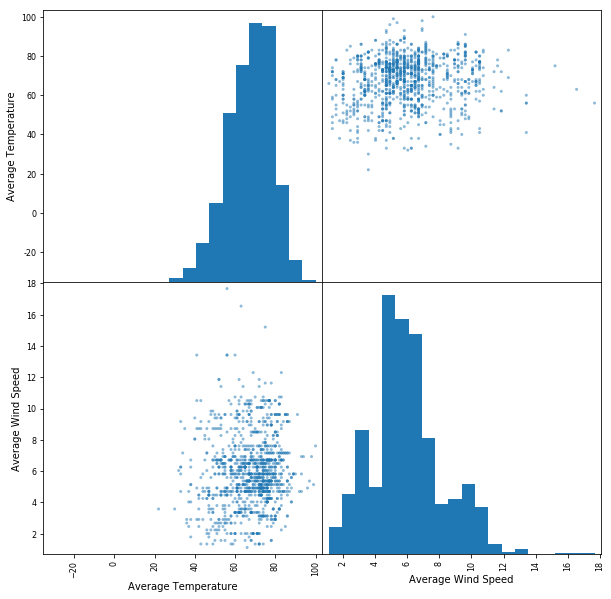

In [61]:
from pandas.plotting import scatter_matrix 
scatter_matrix(ca_wf_tpwd15[['TAVG','AWND']].rename(columns={"TAVG": "Average Temperature", "AWND": "Average Wind Speed"}), figsize = (10,10), hist_kwds={'bins':20} )


In [62]:
ca_severe_wf = ca_wf_tpwd15[ca_wf_tpwd15['fire_size']>1000]
ca_wf_tpwd15_cause = ca_wf_tpwd15.groupby('stat_cause_descr').count()
ca_severe_wf_cause = ca_severe_wf.groupby('stat_cause_descr').sum()[['fire_size']]

In [63]:
ca_wf_tpwd15_cause = ca_wf_tpwd15_cause.sort_values(by = 'fire_size', ascending = False)
ca_wf_tpwd15_cause = ca_wf_tpwd15_cause[:7]

ca_severe_wf_cause = ca_severe_wf_cause.sort_values(by = 'fire_size', ascending = False)
ca_severe_wf_cause = ca_severe_wf_cause[:5]

Text(0.5, 0, 'Burned acres (in million)')

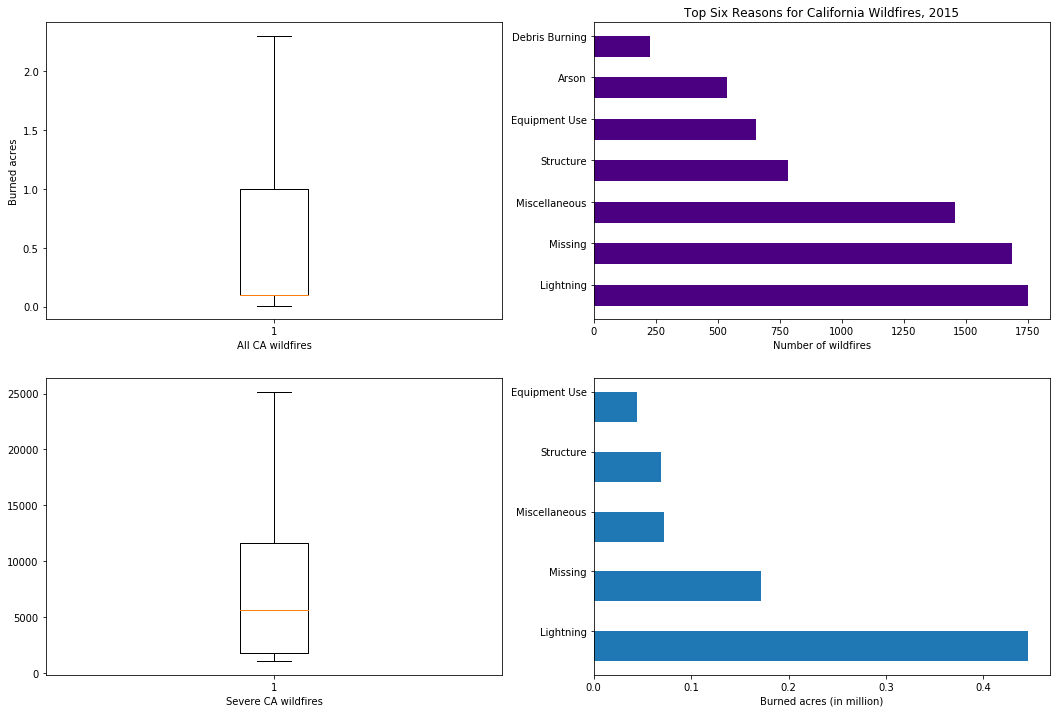

In [64]:
x_lables = ['Lightning', 'Missing','Miscellaneous', 'Structure', 
       'Equipment Use','Arson','Debris Burning']
x_lables2 = ['Lightning', 'Missing','Miscellaneous', 'Structure', 
       'Equipment Use']

fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,2)
ax4 = fig.add_subplot(2,2,4)

ax1.boxplot(ca_wf_tpwd15['fire_size'],showfliers = False)
ax2.boxplot(ca_severe_wf['fire_size'],showfliers = False)

bar_widths1 = ca_wf_tpwd15_cause['fire_size'].values # fire counts
bar_positions1 = arange(7) + 0.75
tick_positions1 = range(1,8)

bar_widths2 = ca_severe_wf_cause['fire_size'].values/1000000 # Convert burned acres to millions
bar_positions2 = arange(5) + 0.75
tick_positions2 = range(1,6)

ax3.barh(bar_positions1,bar_widths1,0.5, color  = "indigo")
ax3.set_yticks(tick_positions1)
ax3.set_yticklabels(x_lables)

ax4.barh(bar_positions2,bar_widths2,0.5)
ax4.set_yticks(tick_positions2)
ax4.set_yticklabels(x_lables2)

ax1.set_xlabel('All CA wildfires')
ax1.set_ylabel('Burned acres')
ax2.set_xlabel('Severe CA wildfires')
ax3.set_xlabel("Number of wildfires")
ax3.set_title("Top Six Reasons for California Wildfires, 2015")
ax4.set_xlabel("Burned acres (in million)")

## Predicting the reason for wildfires using Random Forest Classifier

This section will use random forest classifier to classify if the wildfire is caused by human-related reasons or by natural reasons. Here, I used California data for example. The same algorithm can be applied to the whole dataset. 

In [65]:
ca_wf_cp1 = ca_wf_tpwd15[:].copy()
ca_wf_cp1.loc['natural_cause'] = 0 

## Classify wildfires caused by lightning as natural cause, and others (except for ones with missing/unidentified reasons) 
## as human-related cause.

In [66]:
 def natural_cause(row):
    if row['stat_cause_descr'] == 'Lightning':
        return 1
    return 0

ca_wf_cp1['natural_cause'] = ca_wf_cp1.apply (lambda row: natural_cause(row), axis=1)

def missing_cause(row):
    if row['stat_cause_descr'] == 'Missing/Undefined':
        return 1
    return 0

ca_wf_cp1['missing_cause'] = ca_wf_cp1.apply (lambda row: missing_cause(row), axis=1)

# Calculate burning days

In [67]:
ca_wf_cp1 = ca_wf_cp1.dropna(subset = ['cont_doy'])
ca_wf_cp1['burning_days'] = ca_wf_cp1['cont_doy'] - ca_wf_cp1['discovery_doy']

# Pick variables that will go into the model
parameters = ['discovery_doy','latitude','longitude','TAVG','burning_days','natural_cause','missing_cause']
parameters2 = ['discovery_doy','latitude','longitude','AWND','TAVG','burning_days','natural_cause','missing_cause']

ca_wf_md1 = ca_wf_cp1[parameters].dropna()
ca_wf_md1 = ca_wf_md1[ca_wf_md1['missing_cause'] == 0]

# Preparing lables and features for the random forest classifier

In [68]:
labels = np.array(ca_wf_md1['natural_cause'])
ca_wf_md1= ca_wf_md1.drop(['natural_cause','missing_cause'], axis = 1)
ca_wf_md1_list = list(ca_wf_md1.columns)
ca_wf_md1 = np.array(ca_wf_md1)

In [69]:
ca_wf_md1_list

['discovery_doy', 'latitude', 'longitude', 'TAVG', 'burning_days']

# Split the data into training and testing sets
# Train the model using the training sets y_pred=clf.predict(X_test)

In [70]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ca_wf_md1, labels, test_size=0.3)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [72]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(ca_wf_md1_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('discovery_doy', 0.26),
 ('latitude', 0.25),
 ('longitude', 0.24),
 ('burning_days', 0.15),
 ('TAVG', 0.1)]

From above, we can see that the most important variables for predicting the causes of wildfire is longitude, discovery date, and latitude. 

In [73]:
# Predicting the causes of wildfires with missing/unidentified causes

ca_wf_missing = ca_wf_cp1[ca_wf_cp1['missing_cause'] == 1]
ca_wf_missing = ca_wf_missing[['discovery_doy', 'latitude', 'longitude', 'TAVG', 'burning_days','fire_size']]
ca_wf_missing = ca_wf_missing.dropna()

result = clf.predict(np.array(ca_wf_missing[['discovery_doy', 'latitude', 'longitude', 'TAVG', 'burning_days']]))
ca_wf_missing['natural_cause_predict'] = result.tolist()
ca_wf_missing

,discovery_doy,latitude,longitude,TAVG,burning_days,fire_size,natural_cause_predict
44,37,37.453600,-118.584200,49.0,10.0,6533.00,0
47,114,37.638600,-118.397500,44.0,0.0,0.10,1
48,169,37.901100,-118.435800,76.0,0.0,0.10,0
61,261,41.641733,-122.999400,66.0,0.0,1.80,0
81,242,41.307381,-122.796450,65.0,0.0,0.01,0
82,208,41.384950,-122.836767,71.0,0.0,0.01,1
109,133,40.739600,-123.061100,44.0,0.0,1.00,0
110,183,40.737768,-123.000726,76.0,0.0,0.10,0
231,103,41.755317,-121.998000,33.0,0.0,0.10,1
232,149,41.998467,-121.954367,67.0,0.0,0.10,1


In [74]:
ca_wf_missing['natural_cause_predict'].value_counts(normalize = True)

0    0.968404
1    0.031596
Name: natural_cause_predict, dtype: float64

Based on the above result, we can see among all the wildfires that have missing or unidentified reasons, 3% maybe caused by natural reasons, and 97% were probably caused by human-related reasons.